# Bank Churn Rate Analysis

### Objective : 
- What factors affects clients to be attrited
- What recommendation can we get from the dataset

### About the dataset
This dataset is obtained from kaggle. The data set is about a bank credit card service and shows data about customers churn. This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

link to the dataset : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

## EDA

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats

In [2]:
# loading the dataset
df = pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

Drop some of the feature that is not wanted
- CLIENTNUM : consist of data about the customer unique identifier. not really relevant for the analysis
- The last two columns is not relevant

In [5]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Checking if there are any empty values. It seems that there is none.

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

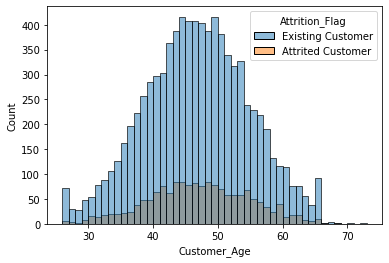

In [6]:
sns.histplot(x = 'Customer_Age', hue = "Attrition_Flag", data = df)

Comparing the customer age and the customer status. From the graph we can tell that there is no significant difference in age between Attrited customer and existing customer.

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

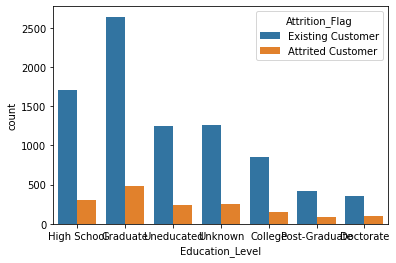

In [7]:
sns.countplot(x = 'Education_Level', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer education and their attrition status.

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

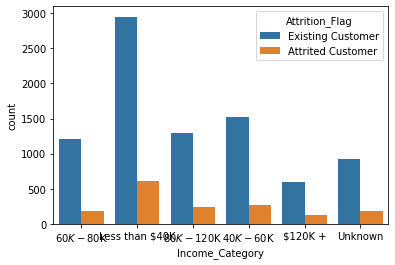

In [8]:
sns.countplot(x = 'Income_Category', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer Income and their attrition status.

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

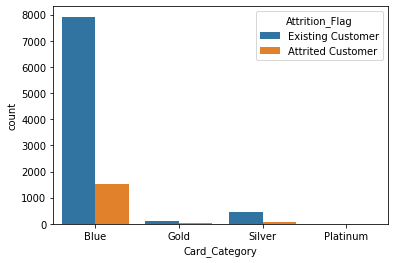

In [9]:
sns.countplot(x = 'Card_Category', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer card category and their attrition status.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

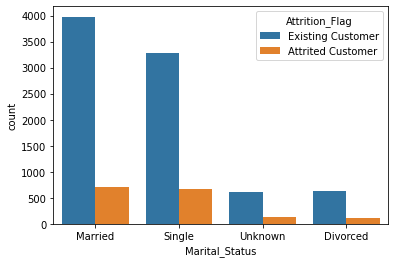

In [10]:
sns.countplot(x = 'Marital_Status', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer marital status and their attrition status.

<AxesSubplot:xlabel='Gender', ylabel='count'>

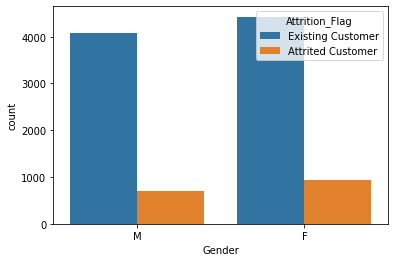

In [11]:
sns.countplot(x = 'Gender', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer gender and their attrition status.

In [12]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

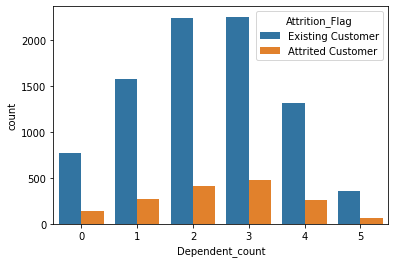

In [13]:
sns.countplot(x = 'Dependent_count', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer number of people that are dependent on them and their attrition status.

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

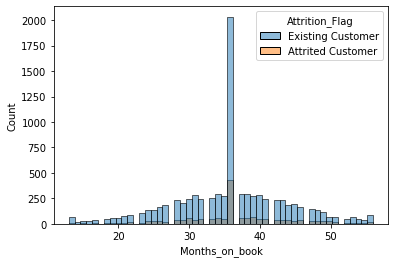

In [14]:
sns.histplot(x = 'Months_on_book', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer number on book on them and their attrition status.

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

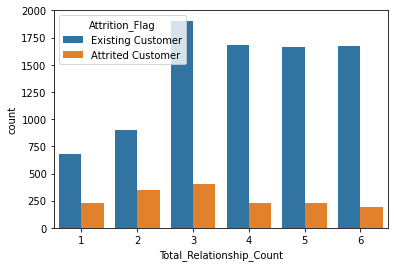

In [15]:
sns.countplot(x = 'Total_Relationship_Count', hue = "Attrition_Flag", data = df)

There is not much difference between the amount of products that the customer have with the bank but we can see that customers with only 1 and 2 products have more attrition rate that those with 3 or greater.

In [16]:
stats.ttest_ind(a=df[df['Attrition_Flag'] == 'Attrited Customer']['Total_Relationship_Count'], b=df[df['Attrition_Flag'] == 'Existing Customer']['Total_Relationship_Count'], equal_var=True)

Ttest_indResult(statistic=-15.26672479205373, pvalue=4.829281002184844e-52)

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

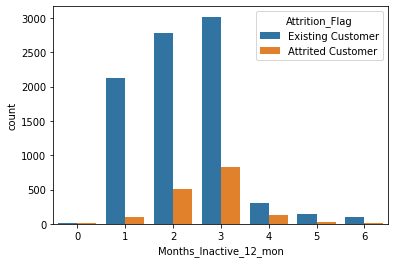

In [17]:
sns.countplot(x = 'Months_Inactive_12_mon', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer number of inactive months and their attrition status.

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

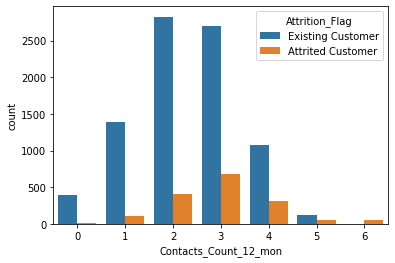

In [18]:
sns.countplot(x = 'Contacts_Count_12_mon', hue = "Attrition_Flag", data = df)

There is also no significant differences between the customer number of contacts and their attrition status.

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

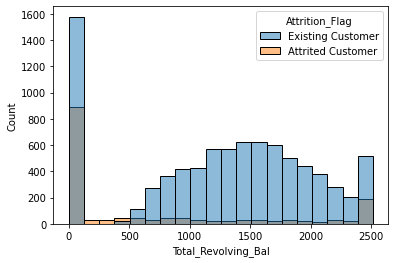

In [19]:
sns.histplot(x = 'Total_Revolving_Bal', hue = "Attrition_Flag", data = df)

We can see from the graph that people with low total revolving balance have higher attrition rate compared to those with higher number.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

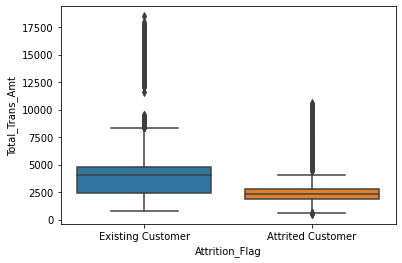

In [40]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Trans_Amt', data =df)

We can see that attrited customers have less total transaction amount on average compared to the existing customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

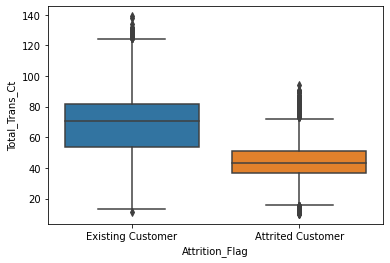

In [41]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Trans_Ct', data =df)

We can also see that customers that are attrited have less transaction counts on average compared to the existing customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

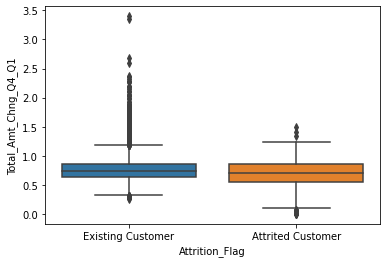

In [43]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Amt_Chng_Q4_Q1', data =df)

There is not much difference between attrited customer and existing customer in their change in transaction amount change throughout the year.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

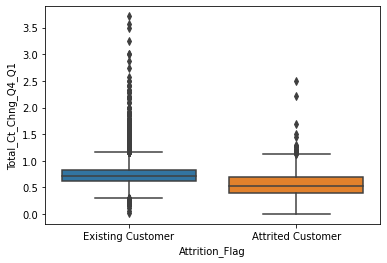

In [23]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Ct_Chng_Q4_Q1', data = df)

We can see a lower average between attrited customer and existing customer in their change in transaction count change throughout the year.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

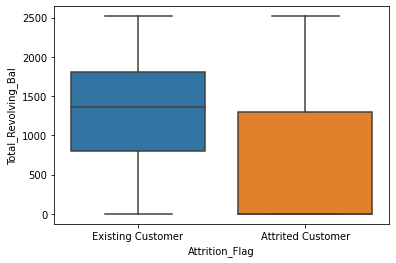

In [44]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal', data = df)

Attrited customers have less revolving balance compared to existing customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

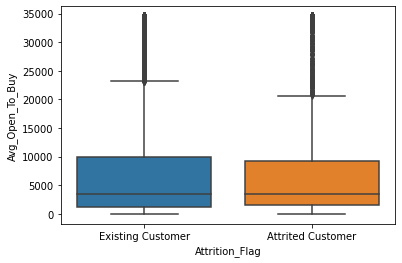

In [26]:
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Open_To_Buy', data = df)

There are not much difference between attrited and existing customers in terms of their open to buy credit.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

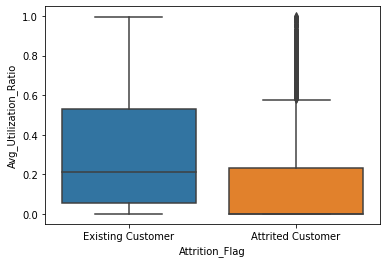

In [28]:
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio', data = df)

Attrited customers have less average in their utilization ratio compared to existing customers.

### Summary
- There is not much difference between attrited and existing customers in terms of their demographic background (age, income, etc).
- Most of the signs that we can see from attrited customers is their lack of activities with their credit account. This was shown by the lower number for variables such as their total transaction amount, utilization ratio, or their revolving balance.

### Recomendation
- It might be good to track the customers activities on using the credit card and see if an account activity has decreased, we can reach out to them so that we can learn and plan strategies to increase their activities with their credit account.